In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\Digilians\Data Sets\Titanic\train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['AgeFull'] = df['Age'].fillna( df['Age'].mean())

In [5]:
df['Age'].isnull().sum()

np.int64(177)

In [6]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFull
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5,B19,S,61.0
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,16.0


In [7]:
agefull = df.pop('AgeFull')

In [8]:
df.insert(5,'AgeFull',agefull)
df.drop('Age',inplace=True,axis=1)

In [9]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [10]:
df.isnull().sum()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,AgeFull,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
AgeFull        0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
AgeFull        0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df['Sex']=df['Sex'].str.lower()

In [16]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [17]:
df['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [18]:
df = pd.get_dummies(df,columns=['Embarked'])

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,AgeFull,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True


In [20]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1 

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,AgeFull,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,False,True,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,True,False,False,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,False,True,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,False,True,1


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'AgeFull', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'FamilySize'],
      dtype='object')

In [23]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace = True)

In [24]:
df.sample()

,Survived,Pclass,Sex,AgeFull,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
853,1,1,0,16.0,0,1,39.4,False,False,True,2


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


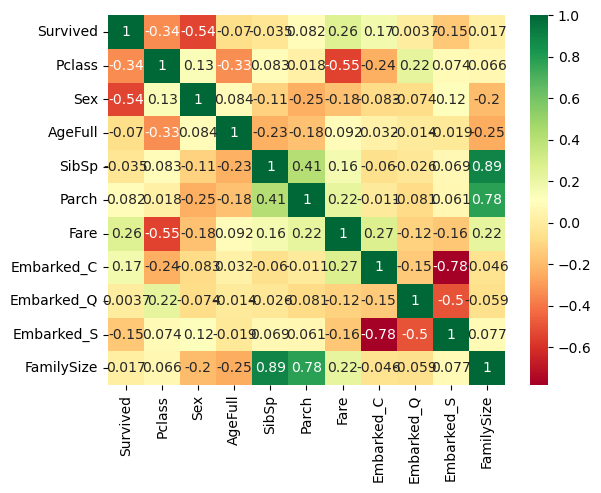

In [26]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
df['AgeFull']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: AgeFull, Length: 891, dtype: float64

In [28]:
scaler = StandardScaler()
df[['AgeFull','Fare']] = scaler.fit_transform(df[['AgeFull','Fare']])

In [29]:
df.to_csv('D:\Digilians\Data Sets\Titanic\CleanedTrain.csv',index=False)

In [30]:
df.sample(5)

,Survived,Pclass,Sex,AgeFull,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
853,1,1,0,-1.054207,0,1,0.144885,False,False,True,2
196,0,3,1,0.000000,0,0,-0.492378,False,True,False,1
734,0,2,1,-0.515526,0,0,-0.386671,False,False,True,1
682,0,3,1,-0.746389,0,0,-0.462679,False,False,True,1
355,0,3,1,-0.130754,0,0,-0.457142,False,False,True,1


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
X = df.drop("Survived",axis=1)
y = df['Survived']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
rfc_model = RandomForestClassifier(n_estimators=300,random_state=70)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=70)

In [35]:
prediction = rfc_model.predict(X_test)
print(f'Accurcy = {accuracy_score(y_test,prediction) *100:.2f}%')

Accurcy = 82.68%


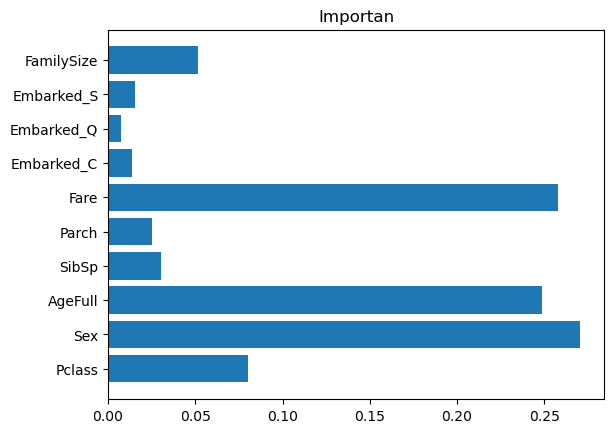

In [36]:
import matplotlib.pyplot as plt
importances = rfc_model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.title('Importan')
plt.show()

(Accuracy): 82.12%

--- Perf.. Report ---
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


 Created --> final_predictions.csv


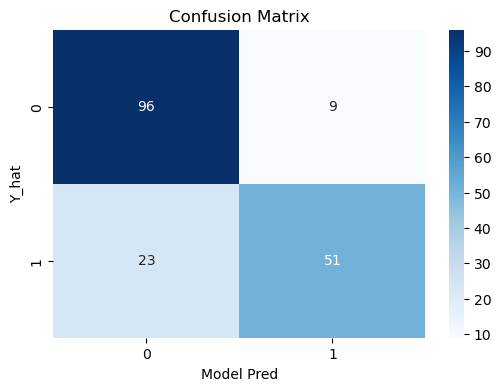

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. تحميل البيانات
train_df = pd.read_csv('CleanedTrain.csv')
test_df = pd.read_csv('test.csv')

def prepare_test_data(test, train_columns):
    df = test.copy()
    
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0}) 
    
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    df = pd.get_dummies(df, columns=['Embarked'])
    
    df.rename(columns={'Age': 'AgeFull'}, inplace=True)
    
    feature_cols = [c for c in train_columns if c != 'Survived']
    
    for col in feature_cols:
        if col not in df.columns:
            df[col] = 0
            
    return df[feature_cols]

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)

print(f"(Accuracy): {acc*100:.2f}%")
print("\n--- Perf.. Report ---")
print(classification_report(y_val, y_pred))

X_test_final = prepare_test_data(test_df, X.columns)
final_predictions = model.predict(X_test_final)

submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": final_predictions
})

submission.to_csv('final_predictions.csv', index=False)
print("\n Created --> final_predictions.csv")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Model Pred')
plt.ylabel('Y_hat')
plt.title('Confusion Matrix')
plt.show()